In [1]:
from PIL import Image
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from krwordrank.word import KRWordRank
from krwordrank.word import summarize_with_keywords
from krwordrank.sentence import summarize_with_sentences

# 2030 데이터로 키워드 추출

In [2]:
df = pd.read_csv('data/data2030_전처리_좋아요가중치_텍스트전처리.csv', index_col=0)
df

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like,Weighted_comment,Comment_textPreprocessing
Title,,,,,,,,,,
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,샤인디케이,"내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.",2021-04-10,박시영TV,6400.0,83.0,48.0,"['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.', ...","내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다."
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,문동렬,2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. ...,2021-04-10,박시영TV,6400.0,83.0,37.0,['2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다...,2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다....
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,135 swan,전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 ...,2021-04-10,박시영TV,6400.0,83.0,34.0,['전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보...,"전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로..."
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,미루,몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새...,2021-04-10,박시영TV,6400.0,83.0,67.0,['몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단...,몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진...
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,단아란,네 죄송합니다. 삭제하겠습니다,2021-04-10,박시영TV,6400.0,83.0,34.0,"['네 죄송합니다. 삭제하겠습니다', '네 죄송합니다. 삭제하겠습니다', '네 죄송...",네 죄송합니다. 삭제하겠습니다
...,...,...,...,...,...,...,...,...,...,...
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,유창준,"간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다.",2021-04-17,MBCNEWS,615.0,88.0,1.0,"간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다.","간교한 인간성을 가진, 김종인, 안 띨 수를 섬기느니.. 죽는 게 낫다."
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,유정순,이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나,2021-04-17,MBCNEWS,615.0,88.0,0.0,이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나,이준석 정치 연륜이 뭐가 있다고 이렇게 나와서 이야기를 많이 하고 다니나?
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,Hannah Kim,준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...,2021-04-17,MBCNEWS,615.0,88.0,0.0,준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...,준석아 주둥이 조심해라. 안철수가 할 말이 옳다. 단일화 못 했으면 오세훈 승리 없...


In [3]:
# 2030이 Title 또는 Comment_textPreprocessing에 있는 경우만 추출
df = df[['Comment_textPreprocessing']].reset_index(level=['Title'])\
.query('Title.str.contains("20")  or Comment_textPreprocessing.str.contains("30")',engine='python')
df

,Title,Comment_textPreprocessing
0,#139​ 민주당 지도부가 2030 마음을 얻으려면...,"내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다."
1,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다....
2,#139​ 민주당 지도부가 2030 마음을 얻으려면...,"전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로..."
3,#139​ 민주당 지도부가 2030 마음을 얻으려면...,몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진...
4,#139​ 민주당 지도부가 2030 마음을 얻으려면...,네 죄송합니다. 삭제하겠습니다
...,...,...
56824,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...","간교한 인간성을 가진, 김종인, 안 띨 수를 섬기느니.. 죽는 게 낫다."
56825,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",이준석 정치 연륜이 뭐가 있다고 이렇게 나와서 이야기를 많이 하고 다니나?
56826,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",준석아 주둥이 조심해라. 안철수가 할 말이 옳다. 단일화 못 했으면 오세훈 승리 없...
56827,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",김준석 아웃 밉상


In [4]:
# df에 null값이 있는 지 확인
df.isna().sum()

Title                          0
Comment_textPreprocessing    110
dtype: int64

In [5]:
# df의 null값 제거
df.dropna(axis=0,inplace=True)

In [6]:
# 결측치 잘 제거되었는지 확인
df.isna().sum()

Title                        0
Comment_textPreprocessing    0
dtype: int64

In [7]:
# [:574]부터 오류남 -> 이유&해결방안 찾기
texts = df['Comment_textPreprocessing'].tolist()
texts

['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.',
 '2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다. 2,030도 아닌 사람들이 추측해서 2030의 마음을 이야기하는 것 자체가 문제의식이 없는 것입니다. 아마추어라도 2030사람들을 몇 번이라도 불러서 보여주며 실질적인 것을 들어보는 것이 좋다고 생각해요.',
 '전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로 돌아섰죠! 20대의 경우 성격이 너무나 다르기에 초중반을 나눠서 공략해야 한다고 생각해요! 가령 20대 초반이 등록금 같은 게 문제라면 중반은 취업 후반은 자산 형성처럼 2,030대 고민 혼재 세세하게 고민하는 흔적들을 보여주는 게 중요하다고 생각합니다... 정당 색채가 엷을 때는 사소한 이유로 지지 정당이 변하는 경우가 많으니….',
 '몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진단 새겨들어야 합니다. 황희 두 임 자주 함께해서 2,030대 남성들의 마음을 얻을 방안도 모색해야 합니다. 그리고 전 국민 재난지원금 보편 지급!! 언론개혁!!',
 '네 죄송합니다. 삭제하겠습니다',
 '진짜 민주당 제대로 각성해서 대권 화끈하게 가져오자!!!',
 '당 대표 후보들이 왜 그 모양이야? ㅠㅠ',
 '말씀하신 대로 열심히 2030 관련된 정책 내고 입 안 하는 거 중요하죠. 근데 그거 못지않게 중요한 게 홍보입니다! 우리 이러 이런 거 만들었어 알아봐 줘! 가 아니라 커뮤니티 대응팀 만들어서 홍보 좀 하라고요.. 2030 들 커뮤니티 중독처럼 진짜 많이 합니다. 청와대나 당이나 홍보 마케팅 전문가 좀 잘 들여와서 커뮤니티 공략해야 합니다. 그래야 지지자들이 또 퍼 나르고 하죠.  포탈만큼 중요해요. 유튜브 SNS도 물론 적극적으로 활용하고요. 제발 법안, 정책 홍보 좀 확실하게... 진정성 있는 것도 좋은데 쇼도 필요할 때 해야죠. 커뮤니티에 관심 가지라고 꼭강에 말씀

In [8]:
texts

['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.',
 '2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다. 2,030도 아닌 사람들이 추측해서 2030의 마음을 이야기하는 것 자체가 문제의식이 없는 것입니다. 아마추어라도 2030사람들을 몇 번이라도 불러서 보여주며 실질적인 것을 들어보는 것이 좋다고 생각해요.',
 '전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로 돌아섰죠! 20대의 경우 성격이 너무나 다르기에 초중반을 나눠서 공략해야 한다고 생각해요! 가령 20대 초반이 등록금 같은 게 문제라면 중반은 취업 후반은 자산 형성처럼 2,030대 고민 혼재 세세하게 고민하는 흔적들을 보여주는 게 중요하다고 생각합니다... 정당 색채가 엷을 때는 사소한 이유로 지지 정당이 변하는 경우가 많으니….',
 '몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진단 새겨들어야 합니다. 황희 두 임 자주 함께해서 2,030대 남성들의 마음을 얻을 방안도 모색해야 합니다. 그리고 전 국민 재난지원금 보편 지급!! 언론개혁!!',
 '네 죄송합니다. 삭제하겠습니다',
 '진짜 민주당 제대로 각성해서 대권 화끈하게 가져오자!!!',
 '당 대표 후보들이 왜 그 모양이야? ㅠㅠ',
 '말씀하신 대로 열심히 2030 관련된 정책 내고 입 안 하는 거 중요하죠. 근데 그거 못지않게 중요한 게 홍보입니다! 우리 이러 이런 거 만들었어 알아봐 줘! 가 아니라 커뮤니티 대응팀 만들어서 홍보 좀 하라고요.. 2030 들 커뮤니티 중독처럼 진짜 많이 합니다. 청와대나 당이나 홍보 마케팅 전문가 좀 잘 들여와서 커뮤니티 공략해야 합니다. 그래야 지지자들이 또 퍼 나르고 하죠.  포탈만큼 중요해요. 유튜브 SNS도 물론 적극적으로 활용하고요. 제발 법안, 정책 홍보 좀 확실하게... 진정성 있는 것도 좋은데 쇼도 필요할 때 해야죠. 커뮤니티에 관심 가지라고 꼭강에 말씀

In [9]:
# 불용어 제거
with open('data/stopwords.txt') as fp :
    stopwords = fp.readlines()

stopwords = set([x.strip() for x in stopwords])

In [10]:
keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 66755
done = 9 Early stopped.


In [11]:
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
passwords

{'20대': 157.33682688530718,
 '페미': 101.250573166133,
 '여성': 78.23418640338757,
 '국민': 60.1714446876394,
 '지금': 59.96272521857698,
 '사람': 55.60899311404767,
 '남성': 54.87152990822264,
 '남자': 53.18310409188969,
 '생각': 53.11173015929891,
 '정치': 47.99315734274395,
 '지지': 46.73033290800792,
 '나라': 43.39389316950321,
 '보수': 39.024532723382634,
 '선거': 38.13919282036035,
 '여자': 32.60062658133718,
 '투표': 32.45167046097425,
 '진보': 31.92966385833568,
 '정권': 31.19935810778489,
 '보고': 30.58772873893123,
 '문제': 30.05240612214668,
 '청년': 29.899778234517008,
 '정책': 29.840719177392106,
 '사회': 27.96978231101865,
 '부동산': 27.686051831118746,
 '세대': 27.658644357715552,
 '언론': 27.516698280294566,
 '많이': 27.182605615917854,
 '정신': 26.90848950694858,
 '정부': 26.478747069181342,
 '대통령': 26.41697226488156,
 '서울': 25.9297678100198,
 '그렇게': 24.04502713683554,
 '박영선': 23.94415267216263,
 '내가': 23.715734611128802,
 '40대': 23.583001450064142,
 '거지': 23.259134529472693,
 '30': 21.98914632352785,
 '아직도': 21.937172189818

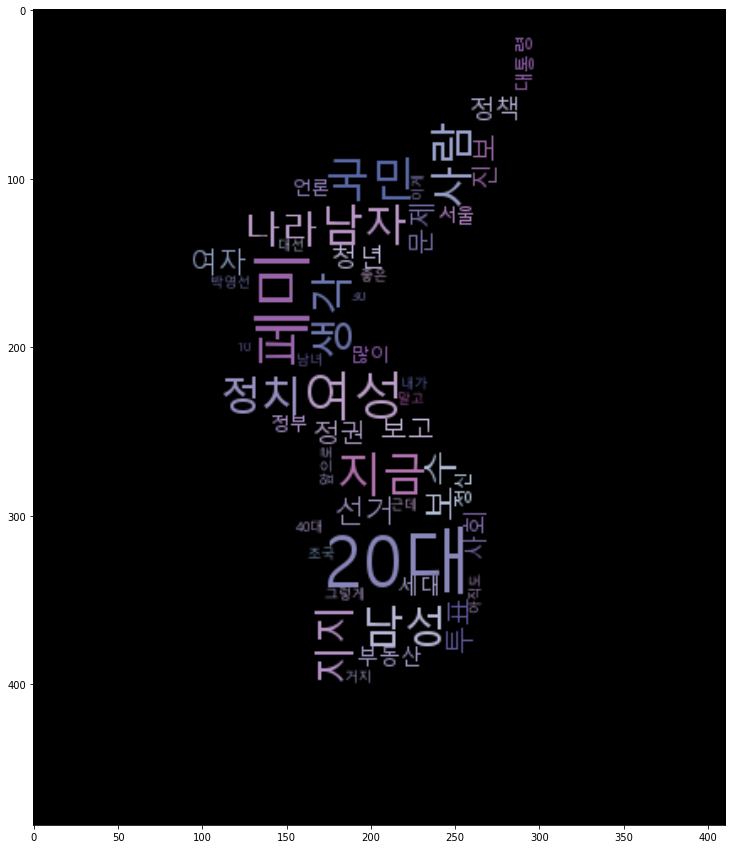

In [12]:
# 워드클라우드 색상 변경 함수 (리턴 위 : 보라색, 리턴 아래 : 회색 계열)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))
    #return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)
    
# 폰트 패스 설정
font_path = "c:/Windows/Fonts/malgun.ttf"

# 바탕화면 지도 모양으로 만들기 위해 지도 이미지 들고오기
image_map = np.array(Image.open('data/map.png'))

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    mask=image_map,
    background_color="black",
    color_func = color_func
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

fig = plt.figure(figsize=(15, 15))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

# wordcloud 불용어 있으면 불용어 사전에 추가하기

In [13]:
# f = open("data/stopwords.txt",'a')
# for t in stopwords:
#     f.write(t+'\n')
# f.close()

In [14]:
# f = open("data/stopwords.txt",'a')
# f.write('됩니다.\n')
# f.write('합니다.\n')
# f.write('것이\n')
# f.write('입니다.\n')
# f.write('있습니다.\n')
# f.write('이렇게.\n')
# f.write('한다.\n')
# f.write('겁니다.\n')
# f.write('민주당\n')
# f.write('오세훈\n')
# f.write('문재인\n')
# f.write('것을\n')
# f.write('이렇게\n')
# f.write('너무\n')
# f.write('가지고\n')
# f.write('ㅋㅋ\n')
# f.write('크크크\n')
# f.write('대한\n')
# f.close()

# 핵심 문장 추출

In [15]:
# 불용어 처리 O 버전
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1 # 너무 길거나 짧은 문장 제거

stopwords = stopwords
num_keywords = 200
num_keysents = 1000

# 다양한 조건 추가 (불용어 처리 등등)
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.9,
    num_keywords=num_keywords,
    num_keysents=num_keysents,
    verbose=False
)
print(sents,keywords)
print(len(keywords))

['여성 페미니스트의 주장 20대 남자는 매우 미숙하니 투표권 없애야 하고 만 16세 생리 이후 여자는 여성으로 보고 투표권 행세해야 합니다.', '우리나라는 진보나 보수나 진정 국민을 생각하는 정치인들은 없음.', '10대 남성이 갈아엎을 거 기다리지 말고 지금 20, 30대가 갈아엎어야지 뭘 그때까지 기다림. 40대가 끝까지 문제면 쳐내 그냥', '저 지지율이 정말 경악스럽네요. 아직도 지지하는 사람들이 있는 게 참 내가 하면 로맨스 남이 하면 불륜 or 더불어 공산당 or 남 탓 정부', '이게 시작이야.. 서울시장, 대선, 그리고 국회의원 선거로 차례차례 무능하면서 착한 척만 오지는.. 너희들을 청소할 때가 왔어….', '추녀 진절머리가 난다. 대통령은 묵묵부답이 정권은 정신세계 참 독특하다 잘못하고도 사과하는 인간이 없네', '거짓 정당 문재인! 박영선 무엇이라고 정의당이라고 그리고 오세훈 후보 거짓말을 한다고? 거짓말을 어느 당이 더 많이 했는가?', '언론 개혁 못 하면 미래는 없다고 그렇게 말했는데 뭉그적거린 결과 정확한 말씀입니다', '사회적 거리도 기 정책 진짜 잣같이 시행하는 건 알겠음 근데 페북이나 인스타 같은 SNS에 극우 네티즌들로 도배되는 거 효과 본 것도 있는 듯', '임 대표님 오늘 영상 참 좋습니다. 요즘 젊은 세대들이 볼 영상입니다. 저도 애들한테 추천 하려니 다 감사합니다.', '저희 집은 주식으로 폭 망해서 안 좋은 기 억이 있습니다. 부동산은 가격이 떨어져도 가족들이 살 기 좋아하니 기분은 좋더군요', '조국 장관님 항상 응원합니다. 가짜 뉴스로 현혹하는 유튜브와 적폐 청산은 깨어 있는 시민님 들 목표입니다. 황희 두 임 응원합니다', '저건 모르는 게 아니다. 이미 다 알고 있는데 사실대로 말하면 더 욕먹을까 봐 일부러 피하는 거지', '나는 60대인데 이 청년 어쩜 이렇게 시대를 궤 뚫고 있으니 눈물이 났다 너의 말이 다 맞다.', '자기들이 남녀 갈등 만들어서 편 가르기도 해놓고 왜 갈렸나 분석하는 것임? 진짜로? 

In [16]:
print(f'핵심 키워드 개수: {len(keywords)}')
print(f'핵심 키워드 : {keywords}')

핵심 키워드 개수: 200
핵심 키워드 : {'20대': 157.33682688530718, '페미': 101.250573166133, '여성': 78.23418640338757, '국민': 60.1714446876394, '지금': 59.96272521857698, '사람': 55.60899311404767, '남성': 54.87152990822264, '남자': 53.18310409188969, '생각': 53.11173015929891, '정치': 47.99315734274395, '지지': 46.73033290800792, '나라': 43.39389316950321, '보수': 39.024532723382634, '선거': 38.13919282036035, '여자': 32.60062658133718, '투표': 32.45167046097425, '진보': 31.92966385833568, '정권': 31.19935810778489, '보고': 30.58772873893123, '문제': 30.05240612214668, '청년': 29.899778234517008, '정책': 29.840719177392106, '사회': 27.96978231101865, '부동산': 27.686051831118746, '세대': 27.658644357715552, '언론': 27.516698280294566, '많이': 27.182605615917854, '정신': 26.90848950694858, '정부': 26.478747069181342, '대통령': 26.41697226488156, '서울': 25.9297678100198, '그렇게': 24.04502713683554, '박영선': 23.94415267216263, '내가': 23.715734611128802, '40대': 23.583001450064142, '거지': 23.259134529472693, '30': 21.98914632352785, '아직도': 21.93717218981821, '10': 21.

In [17]:
# 핵심 키워드 리스트로 저장
keywords_list = []
for k,v in keywords.items():
    keywords_list.append(k)
keywords_list = keywords_list
keywords_list

['20대',
 '페미',
 '여성',
 '국민',
 '지금',
 '사람',
 '남성',
 '남자',
 '생각',
 '정치',
 '지지',
 '나라',
 '보수',
 '선거',
 '여자',
 '투표',
 '진보',
 '정권',
 '보고',
 '문제',
 '청년',
 '정책',
 '사회',
 '부동산',
 '세대',
 '언론',
 '많이',
 '정신',
 '정부',
 '대통령',
 '서울',
 '그렇게',
 '박영선',
 '내가',
 '40대',
 '거지',
 '30',
 '아직도',
 '10',
 '좋은',
 '근데',
 '말고',
 '남녀',
 '조국',
 '대선',
 '앞으로',
 '이게',
 '파이팅',
 '영상',
 '후보',
 '의원',
 '이유',
 '개혁',
 '것도',
 '이미',
 '저는',
 '역사',
 '시장',
 '위한',
 '공정',
 '한국',
 '검찰',
 '왕토',
 '말이',
 '방송',
 '피해',
 '부정',
 '것은',
 '군대',
 '코로나',
 '주식',
 '대치어',
 '잘못',
 '결과',
 '좌파',
 '감사',
 '정도',
 '알고',
 '그러',
 '사실',
 '뉴스',
 '적폐',
 '미래',
 '나오',
 '국가',
 '180석',
 '말씀',
 '이삼십대',
 '소리',
 '갈등',
 'LH',
 '그걸',
 '있습',
 '말을',
 '없이',
 '국회',
 '정당',
 '경험',
 '세금',
 '평등',
 '못하',
 '저도',
 '인간',
 '취업',
 '정의',
 '세상',
 '내년',
 '나는',
 '거야',
 '이해',
 '박근혜',
 '말하',
 'ㅠㅠ',
 '있으',
 '가산점',
 '조작',
 '경제',
 '관심',
 '이준석',
 '살아',
 '당연',
 '거짓',
 '분석',
 '집값',
 '힘을',
 '분노',
 '못한',
 '거다',
 '잘하',
 '필요',
 '자유',
 '제가',
 '열심히',
 '일베',
 '허경영',
 '얘기',
 '50',
 '이명박',
 '표를',
 '있었',

In [18]:
print(f'핵심 문장 개수: {len(sents)}')
print(f'핵심 문장 : {sents}')

핵심 문장 개수: 1000
핵심 문장 : ['여성 페미니스트의 주장 20대 남자는 매우 미숙하니 투표권 없애야 하고 만 16세 생리 이후 여자는 여성으로 보고 투표권 행세해야 합니다.', '우리나라는 진보나 보수나 진정 국민을 생각하는 정치인들은 없음.', '10대 남성이 갈아엎을 거 기다리지 말고 지금 20, 30대가 갈아엎어야지 뭘 그때까지 기다림. 40대가 끝까지 문제면 쳐내 그냥', '저 지지율이 정말 경악스럽네요. 아직도 지지하는 사람들이 있는 게 참 내가 하면 로맨스 남이 하면 불륜 or 더불어 공산당 or 남 탓 정부', '이게 시작이야.. 서울시장, 대선, 그리고 국회의원 선거로 차례차례 무능하면서 착한 척만 오지는.. 너희들을 청소할 때가 왔어….', '추녀 진절머리가 난다. 대통령은 묵묵부답이 정권은 정신세계 참 독특하다 잘못하고도 사과하는 인간이 없네', '거짓 정당 문재인! 박영선 무엇이라고 정의당이라고 그리고 오세훈 후보 거짓말을 한다고? 거짓말을 어느 당이 더 많이 했는가?', '언론 개혁 못 하면 미래는 없다고 그렇게 말했는데 뭉그적거린 결과 정확한 말씀입니다', '사회적 거리도 기 정책 진짜 잣같이 시행하는 건 알겠음 근데 페북이나 인스타 같은 SNS에 극우 네티즌들로 도배되는 거 효과 본 것도 있는 듯', '임 대표님 오늘 영상 참 좋습니다. 요즘 젊은 세대들이 볼 영상입니다. 저도 애들한테 추천 하려니 다 감사합니다.', '저희 집은 주식으로 폭 망해서 안 좋은 기 억이 있습니다. 부동산은 가격이 떨어져도 가족들이 살 기 좋아하니 기분은 좋더군요', '조국 장관님 항상 응원합니다. 가짜 뉴스로 현혹하는 유튜브와 적폐 청산은 깨어 있는 시민님 들 목표입니다. 황희 두 임 응원합니다', '저건 모르는 게 아니다. 이미 다 알고 있는데 사실대로 말하면 더 욕먹을까 봐 일부러 피하는 거지', '나는 60대인데 이 청년 어쩜 이렇게 시대를 궤 뚫고 있으니 눈물이 났다 너의 말이 다 맞다.', '자기들이 남녀 갈등 만들어서 편 가르기도 해

# 추출한 핵심 키워드 저장

In [19]:
keyword = pd.DataFrame()
keyword['keyword'] = keywords_list
keyword

,keyword
0,20대
1,페미
2,여성
3,국민
4,지금
...,...
195,가짜
196,이재명
197,답이
198,세력


In [20]:
keyword.to_csv('data/keyword.csv',encoding='utf-8-sig')

# 추출한 핵심 문장 저장

In [21]:
keysentence = pd.DataFrame()
keysentence['keysentence'] = sents
keysentence

,keysentence
0,여성 페미니스트의 주장 20대 남자는 매우 미숙하니 투표권 없애야 하고 만 16세 ...
1,우리나라는 진보나 보수나 진정 국민을 생각하는 정치인들은 없음.
2,"10대 남성이 갈아엎을 거 기다리지 말고 지금 20, 30대가 갈아엎어야지 뭘 그때..."
3,저 지지율이 정말 경악스럽네요. 아직도 지지하는 사람들이 있는 게 참 내가 하면 로...
4,"이게 시작이야.. 서울시장, 대선, 그리고 국회의원 선거로 차례차례 무능하면서 착한..."
...,...
995,3.6 퍼도 아니고 진짜 36% 맞나 조사업체 못 믿겠네….
996,대한민국이 등을 돌렸다. 이제 저들에겐 전자 개표기뿐이다.
997,방역을 잘해서 백신도 못 구해서 쩔쩔매고 앉았나 ㅋㅋ
998,이인자 삼인자에 머물러야 할 놈이 일인자가 됐으니 개판이지 뭐


In [22]:
keysentence.to_csv('data/keysentence.csv',encoding='utf-8-sig')

# 추출한 핵심 키워드 & 문장 함께 저장

In [23]:
keyword_keysentence = pd.DataFrame()
keyword_keysentence['keyword'] = keywords_list[:len(sents)]
keyword_keysentence['keysentence'] = sents[:len(keyword)]
keyword_keysentence

,keyword,keysentence
0,20대,여성 페미니스트의 주장 20대 남자는 매우 미숙하니 투표권 없애야 하고 만 16세 ...
1,페미,우리나라는 진보나 보수나 진정 국민을 생각하는 정치인들은 없음.
2,여성,"10대 남성이 갈아엎을 거 기다리지 말고 지금 20, 30대가 갈아엎어야지 뭘 그때..."
3,국민,저 지지율이 정말 경악스럽네요. 아직도 지지하는 사람들이 있는 게 참 내가 하면 로...
4,지금,"이게 시작이야.. 서울시장, 대선, 그리고 국회의원 선거로 차례차례 무능하면서 착한..."
...,...,...
195,가짜,그냥 새로운 게 나와도 욕을 먹는 게 일상다반사
196,이재명,전형적인 가해자 마인드로 왜 등 돌렸냐고 묻네
197,답이,스파르타 마냥 자기들이 등 발로 차서 밀어 넣고는 왜 돌렸나
198,세력,대 깨들 다 어디 갓 누. 크크 대단 허다 이니


In [24]:
keyword_keysentence.to_csv('data/keyword_keysentence.csv',encoding='utf-8-sig')